In [1]:
import keras
import pandas as pd
import numpy as np
import PIL
import os
import json
import cv2
import os
import numpy as np
from collections import Counter
import shutil
import sklearn
import sklearn.metrics as metrics
import pytesseract
from matplotlib.pyplot import imshow
%matplotlib inline

# Simple CNN model for CIFAR-10
import keras
from keras.layers import Dense,Dropout,Flatten, Activation,Conv1D,MaxPooling1D,LSTM,Embedding,Input,Conv2D
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Model
from keras.preprocessing import sequence
from keras import backend as K

import keras_metrics
K.common.set_image_dim_ordering('th')
import tensorflow as tf
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage

def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

@as_keras_metric
def auc_pr(y_true, y_pred, curve='PR'):
    return tf.metrics.auc(y_true, y_pred, curve=curve)

# load data
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
from IPython.display import Image

# load json and create model
json_file = open('Json-modelV3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("H5-modelV3.h5")
print("Loaded model from disk")

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics = [auc_pr]) 

Using TensorFlow backend.








Loaded model from disk

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [27]:
from PIL import Image

a = '/home/furkan/Desktop/ocrBuilding/l-1-lد.jpg'
im = PIL.Image.open(a)
b = np.array(im.resize([32,32],PIL.Image.ANTIALIAS))
d = b[:,:,:]
#im = np.array(im)
d = b.reshape((b.shape[0], b.shape[1], 1))

#d = im.resize((32,32,3))
c = model.predict(d)

ValueError: cannot reshape array of size 3072 into shape (32,32,1)

In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from keras.applications import VGG16

# The local path to our target image
img_path = '/home/furkan/Desktop/latin/l-14-ls.jpg'

# `img` is a PIL image of size 150x150
img = image.load_img(img_path, target_size=(150, 150))

# `x` is a float32 Numpy array of shape (150, 150, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 150, 150, 3)
x = np.expand_dims(x, axis=0)
x /= 255

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

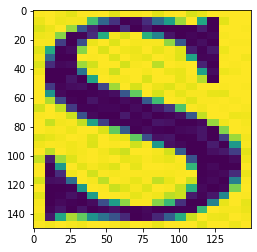

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x[0][0])
plt.show()

In [54]:
x.reshape((150,150,3))
x

array([[[[-102.942924, -102.942924, -102.942924, ..., -102.939   ,
          -102.939   , -102.939   ],
         [-102.942924, -102.942924, -102.942924, ..., -102.939   ,
          -102.939   , -102.939   ],
         [-102.942924, -102.942924, -102.942924, ..., -102.939   ,
          -102.939   , -102.939   ],
         ...,
         [-102.942924, -102.942924, -102.942924, ..., -102.939   ,
          -102.939   , -102.939   ],
         [-102.942924, -102.942924, -102.942924, ..., -102.939   ,
          -102.939   , -102.939   ],
         [-102.942924, -102.942924, -102.942924, ..., -102.939   ,
          -102.939   , -102.939   ]],

        [[-115.78292 , -115.78292 , -115.78292 , ..., -115.779   ,
          -115.779   , -115.779   ],
         [-115.78292 , -115.78292 , -115.78292 , ..., -115.779   ,
          -115.779   , -115.779   ],
         [-115.78292 , -115.78292 , -115.78292 , ..., -115.779   ,
          -115.779   , -115.779   ],
         ...,
         [-115.78292 , -115.78292 

In [4]:
preds = model.predict(x)
print('Predicted:', preds)

ValueError: Error when checking input: expected conv2d_1_input to have shape (150, 150, 3) but got array with shape (3, 150, 150)